In [1]:
from TestProblems import *
from Solvers import *
from PlotFunctions import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# ESDIRK23

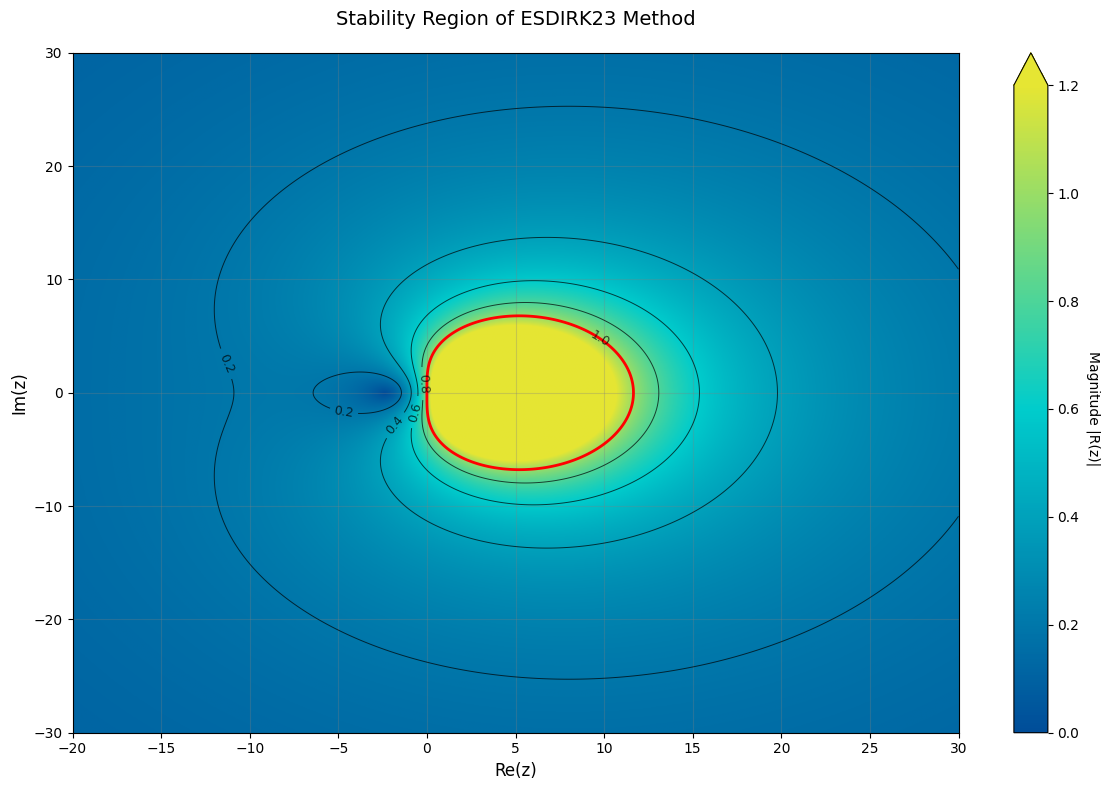

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def esdirk23_stability_function(z):
    """Stability function for ESDIRK23 method"""
    gamma = 1 - np.sqrt(2)/2
    denom = (1 - gamma*z)**2
    return (1 + z*(1 - 2*gamma) + (1/2 - 2*gamma + gamma**2)*z**2) / denom

def plot_stability_region():
    # Create grid
    x = np.linspace(-20, 30, 1000)
    y = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute stability function
    R = np.abs(esdirk23_stability_function(Z))
    
    # Create viridis-like colormap with enhanced contrast
    colors = [(0, 0.3, 0.6), (0, 0.8, 0.8), (0.9, 0.9, 0.2)]  # Blue -> Cyan -> Yellow
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Plot magnitude with enhanced contrast
    im = plt.imshow(R, extent=[-20, 30, -30, 30], 
                   cmap=cmap, vmin=0, vmax=1.2,
                   origin='lower', aspect='auto')
    
    # Add contour lines
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    cs = plt.contour(X, Y, R, levels=levels, 
                    colors='black', linewidths=0.7, alpha=0.7)
    plt.clabel(cs, inline=True, fontsize=9, fmt='%1.1f')
    
    # Highlight the stability boundary
    plt.contour(X, Y, R, levels=[1], colors='red', linewidths=2)
    
    # Formatting
    plt.title('Stability Region of ESDIRK23 Method', fontsize=14, pad=20)
    plt.xlabel('Re(z)', fontsize=12)
    plt.ylabel('Im(z)', fontsize=12)
    plt.grid(True, color='gray', alpha=0.3)
    
    # Colorbar with label
    cbar = plt.colorbar(im, extend='max')
    cbar.set_label('Magnitude |R(z)|', rotation=270, labelpad=15)
    
    # Set axis ticks
    plt.xticks(np.arange(-20, 31, 5))
    plt.yticks(np.arange(-30, 31, 10))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_stability_region()

## Test on test problems

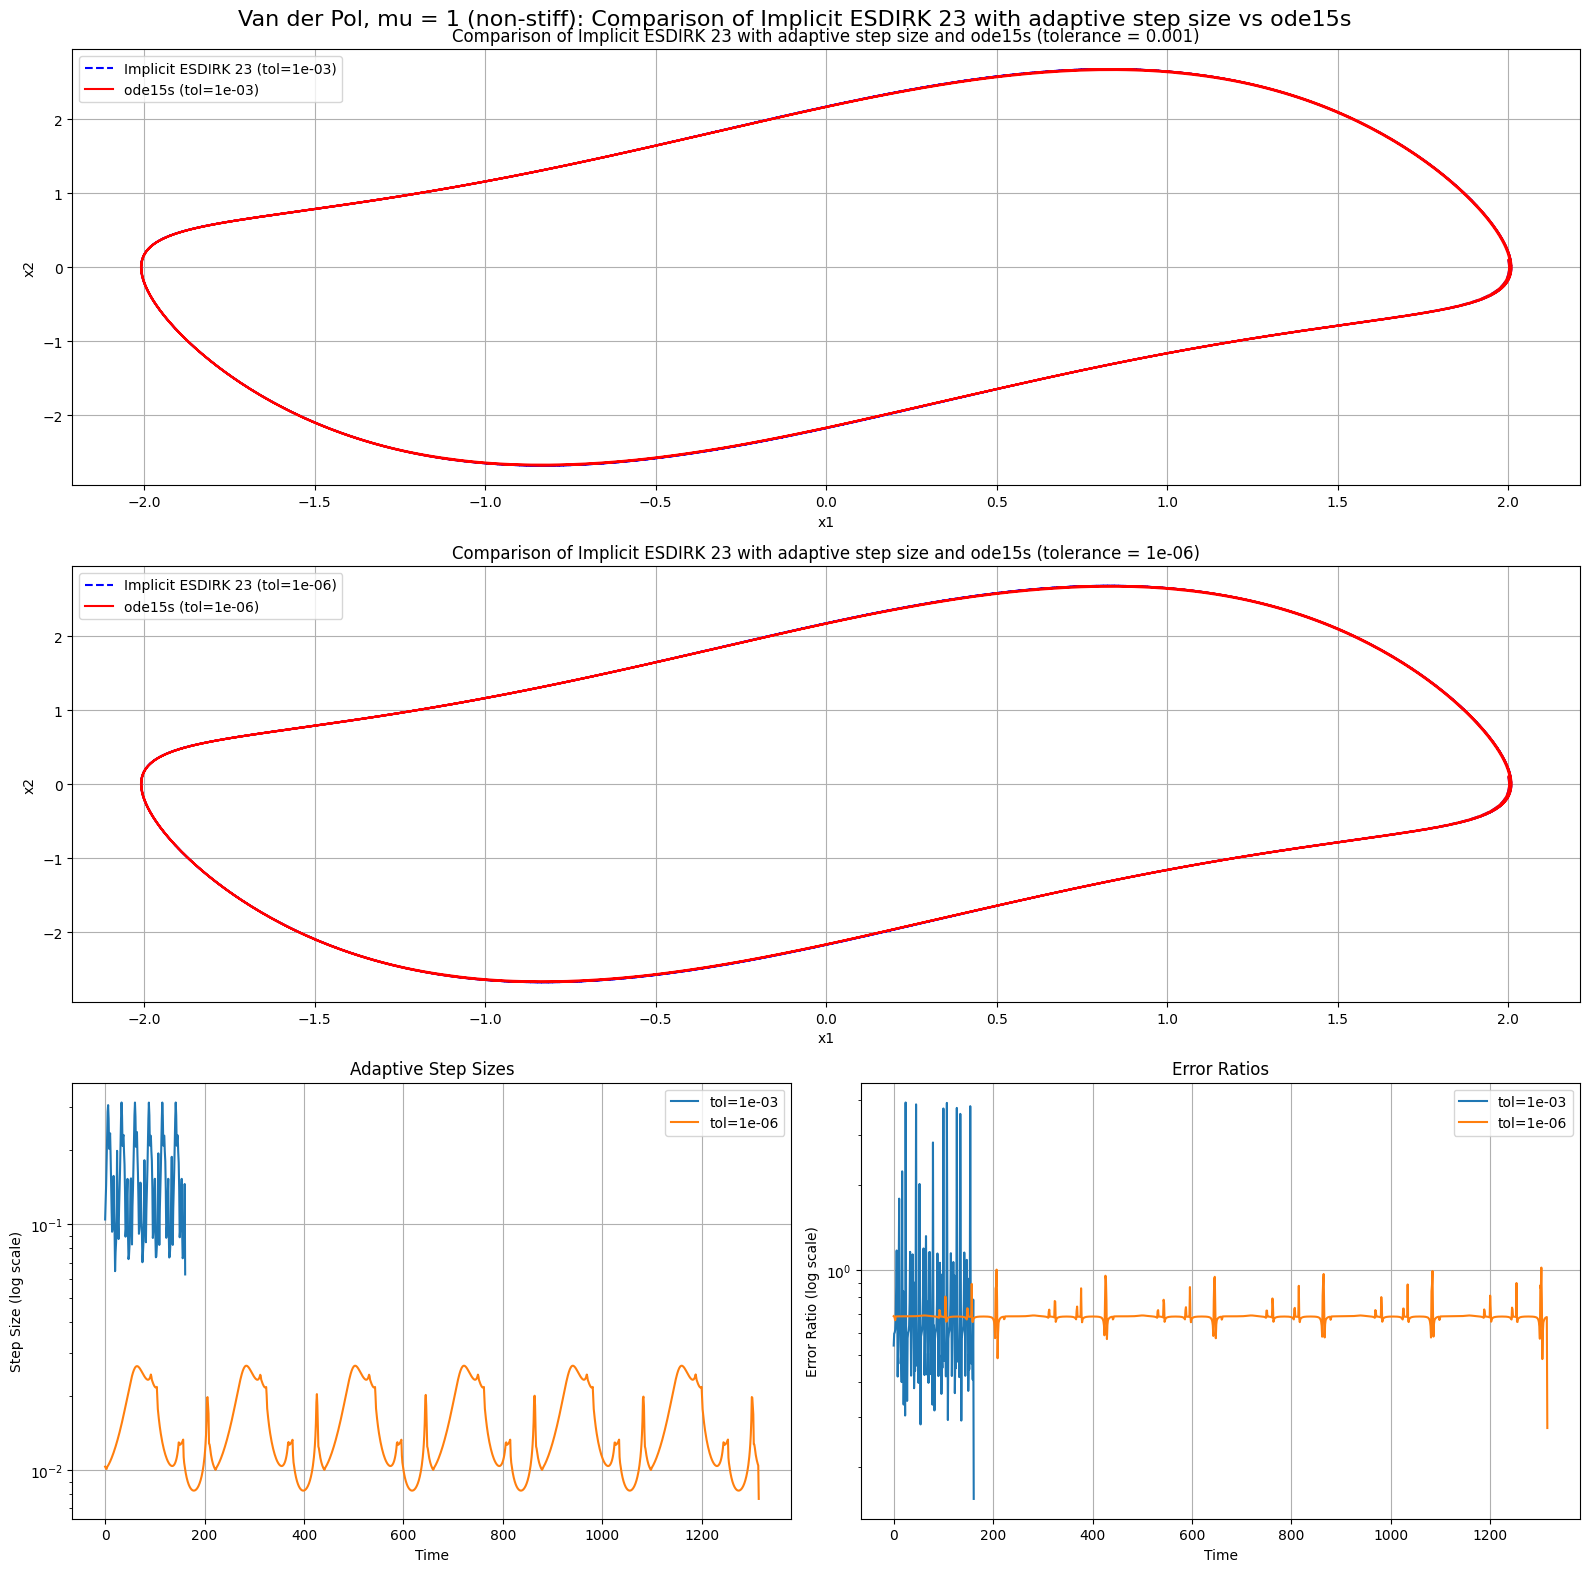

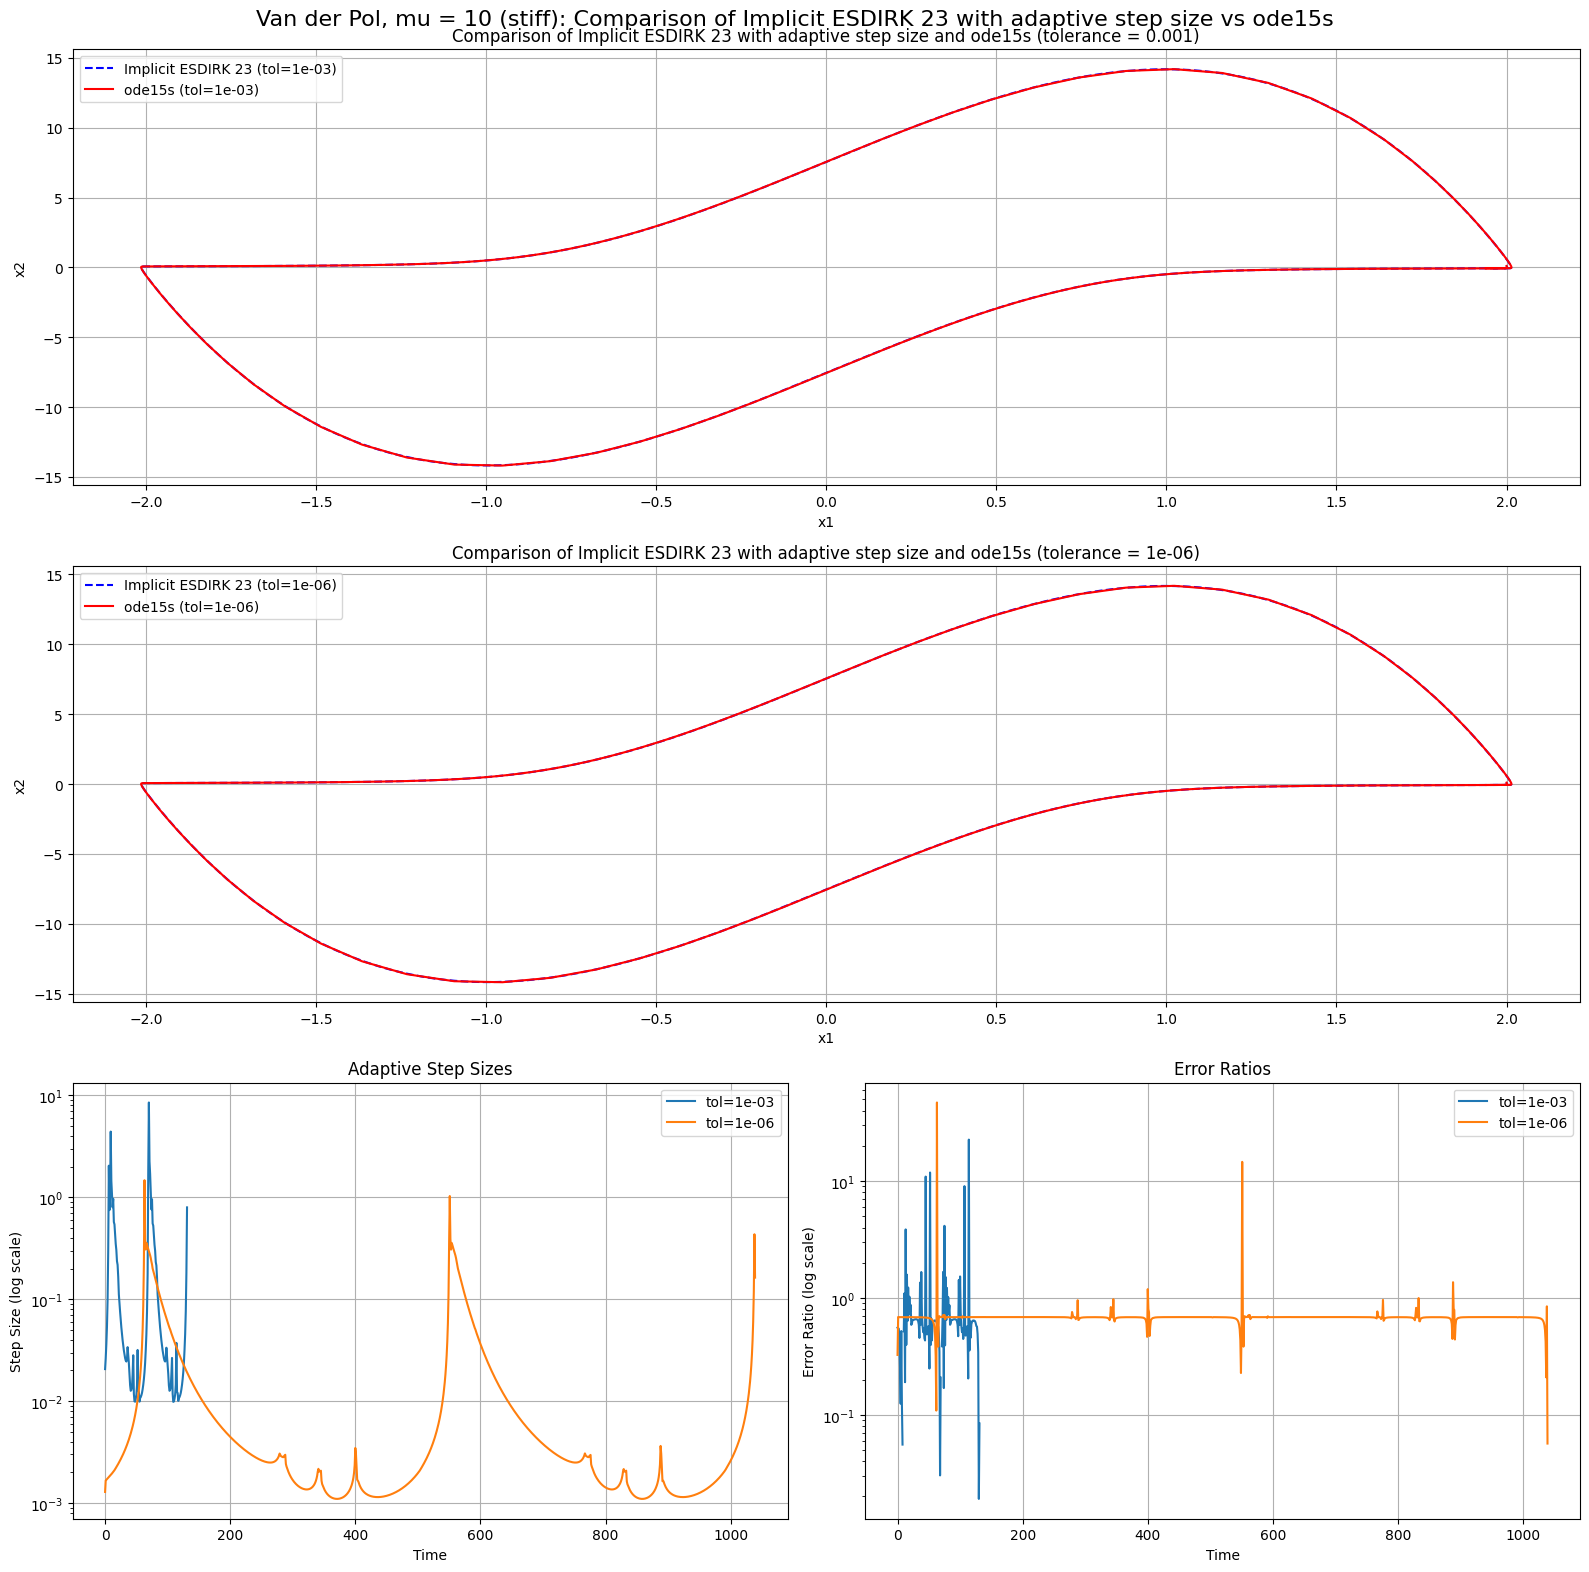

In [2]:
# Define time span and initial conditions
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 10  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0.1])  # Initial condition
vp_ed_adaptive_nonstiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01)
vp_ed_adaptive_stiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01)

KeyboardInterrupt: 

<Figure size 1600x1200 with 0 Axes>

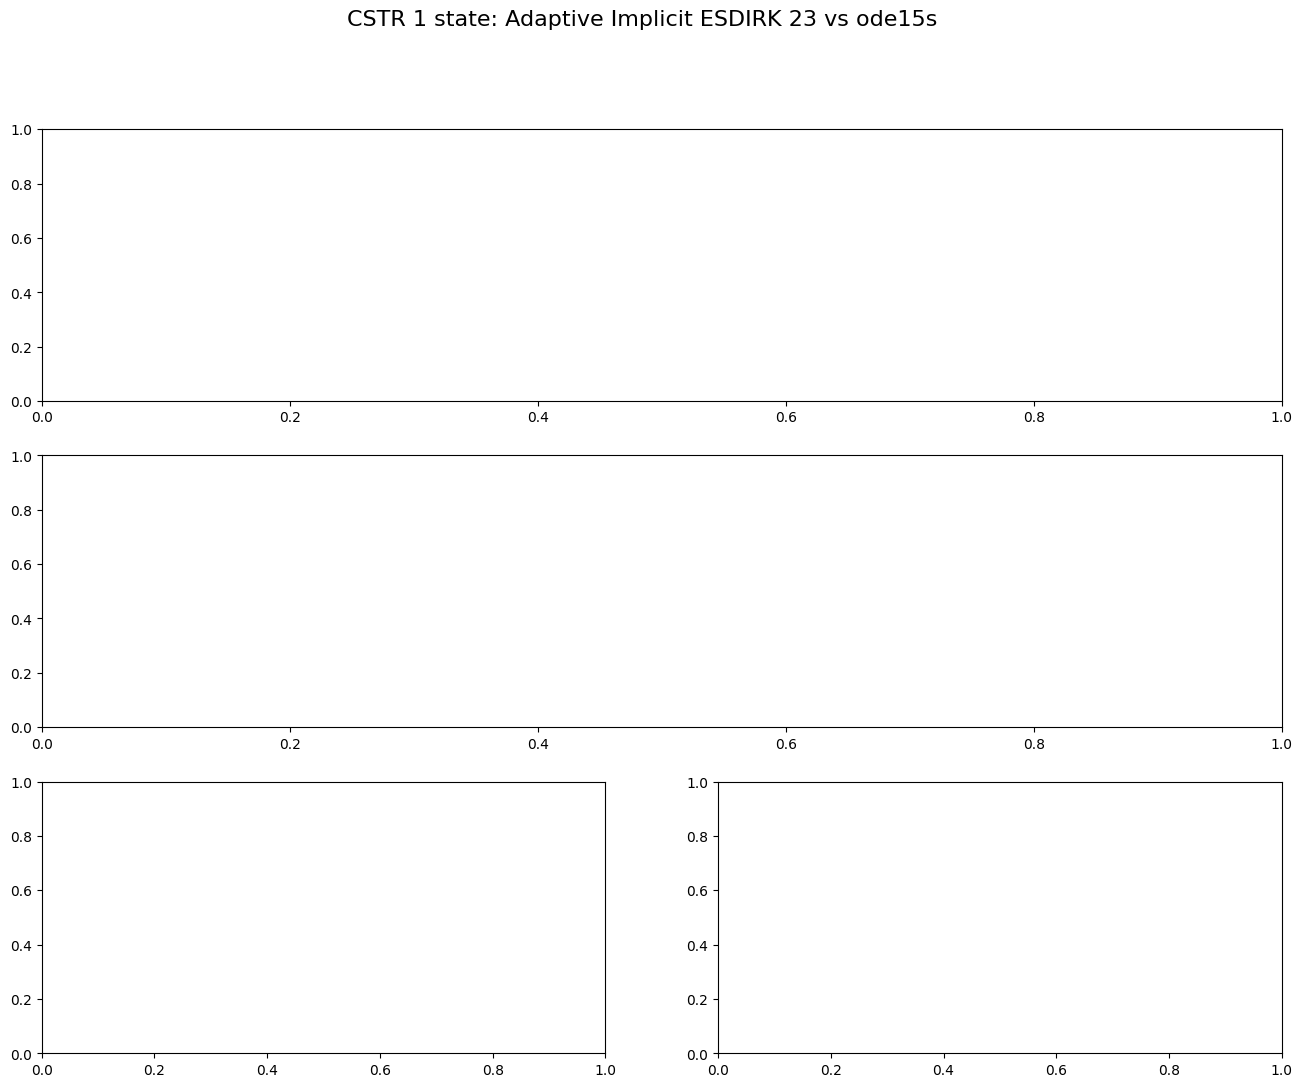

In [5]:
cstr_ed_adptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", reference_solver_name="ode15s", adaptive_steps = True, steptype = "adaptive", implicit=True, reference_solver='BDF', esdirk = True, h0 = 0.01)

In [4]:
#Parameters
t_span = (0, 120)

min = 60
F = [0.7/min,0.6/min,0.5/min,0.4/min,0.3/min,0.2/min,0.3/min,0.4/min,0.5/min,0.6/min,0.7/min,0.7/min,0.2/min,0.2/min,0.7/min,0.7/min]

#F = np.arange(0.1, 0.7, 0.1)/min

t = np.array([])
Tf = np.array([])

Tin = 273.65
CA_in = 2.4/2
CB_in = 1.6/2

x0 = np.array([Tin])
x0_e = np.array([Tin])

N = 500
h0 = t_span[1]/N

# Storage for results
steady_states = np.array([])
flow_rates = np.array([])

for idx, flow in enumerate(F):
    params = [flow,0.105,CA_in,CB_in,Tin]

    f, J = CSTR_1state_model(params, compare = True)
    f_e, J_e = CSTR_1state_model(params, esdirk=True)
    # Solve using odeint
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=np.linspace(t_span[0], t_span[1], N), rtol=1e-5, atol=1e-5, jac=J)
    print("Esdirk")
    y, t, g, info, stat = ESDIRK(f_e, J_e,  t_span, x0_e, h0, 1e-4, 1e-4, Method='ESDIRK23')
    # The steady state is the final point in the simulation
    T_ss = sol.y[0][-1]
    T_ss_e = y[-1][0]
    
    x0 = np.array([T_ss])
    x0_e = np.array([T_ss_e])
    Tf = np.concatenate([Tf, sol.y[0]-Tin])

    # Store results
    steady_states = np.hstack([steady_states, x0])
    print(F[idx])
    flow_rates = np.append(flow_rates, F[idx] * min * 1000)  # Convert back to L/min for plotting

    t = np.concatenate([t, (sol.t+(idx)*t_span[1])/min])


Esdirk


KeyboardInterrupt: 

In [ ]:
#Parameters
t_span = (0, 120)

min = 60
F = [0.7/min,0.6/min,0.5/min,0.4/min,0.3/min,0.2/min,0.3/min,0.4/min,0.5/min,0.6/min,0.7/min,0.7/min,0.2/min,0.2/min,0.7/min,0.7/min]

#F = np.arange(0.1, 0.7, 0.1)/min

t = np.array([])
Tf = np.array([])
Af = np.array([])
Bf = np.array([])

# Initial conditions
Tin = 273.65
CA_in = 2.4/2
CB_in = 1.6/2

x0 = np.array([CA_in, CB_in, Tin])
x0_e = np.array([CA_in, CB_in, Tin])

N = 30
h0 = t_span[1]/N

# Storage for results
steady_states = np.array([[], [], []])
flow_rates = np.array([])   

for idx, f in enumerate(F):
    params = [f,0.105,CA_in,CB_in,Tin]

    f, J = CSTR_3state_model(params)
    # Solve using odeint
    sol = solve_ivp(f, t_span, x0, method='BDF', t_eval=np.linspace(t_span[0], t_span[1], N), Jac=J)
    f_e, J_e = CSTR_3state_model(params, esdirk=True)
    # Solve using ESDIRK
    t, y, g, info, stat = ESDIRK(f_e, J_e,  t_span, x0_e, h0, 1e-12, 1e-12, Method='ESDIRK23')
    print("Esdirk")

    # The steady state is the final point in the simulation
    CA_ss, CB_ss, T_ss = sol.y[:,-1]
    CA_ss_e = y[-1][0]
    CB_ss_e = y[-1][1]
    T_ss_e = y[-1][2]

    x0 = np.array([CA_ss, CB_ss, T_ss])
    Af = np.concatenate([Af, sol.y[0]])
    Bf = np.concatenate([Bf, sol.y[1]])
    Tf = np.concatenate([Tf, sol.y[2]-Tin])
    x0_e = np.array([CA_ss_e, CB_ss_e, T_ss_e])


    # Store results
    steady_states = np.hstack([steady_states, x0[:,None]])
    flow_rates = np.concatenate([flow_rates, F * min])  # Convert back to L/min for plotting

    t = np.concatenate([t, (sol.t+(idx)*t_span[1])/min])
    
    
steady_states = steady_states[:, :]
flow_rates = flow_rates[:]



Esdirk
Esdirk
Esdirk
Esdirk
Esdirk
Esdirk
Esdirk
Esdirk
Esdirk
Esdirk


In [9]:
y[-1][0]

1.1836616458929208